<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 3</h2>

In [ ]:
# Student names and numbers:


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

In [ ]:
# Import all necessary libraries here

# Exercise 1: Regression

For this exercise we will be using the famous nycflights13 data which contains the `airlines`, `airports`, `flights`, `planes`, and `weather` datasets. Please see the documentation (`nycflights13.pdf`) for further information.

**a)** Load all files as pandas dataframes and display the first 5 rows of each dataset.

**b)** Convert all temperature attributes to degree Celsius. We will be using this in what follows.

**c)** Using OLS, investigate if flight distance is associated with arrival delay. You should be cautious regarding negative delays.

**d)** Using OLS, investigate if departure delay is associated with arrival delay. Again,
   consider what to do with negative delays.

**e)** Investigate whether departure delay is associated with weather conditions
   at the origin airport. This includes descriptives, plotting, regression modelling,
   considering missing values etc. For regression, do OLS, Ridge, Lasso, and Elastic Net.
   The analysis should also include seasonality trends as a "weather condition". You could,
   for instance, plot the daily departure delay with the date (or monthly). What are the
   three most important weather conditions when trying to predict departure delays?

**f)** Is the age of the plane associated with delay? Do OLS, Ridge, Lasso, and Elastic Net

**g)** Do a principal component analysis of the weather at JFK using the following columns:
   temp, dewp, humid, wind_dir, wind_speed, precip, visib.
   How many principal components should be used to capture the variability in the weather data?

**h)** Build regression models (OLS, Ridge, Lasso, and Elastic Net) that associates
   an airports lattitude with weather conditions (temp, dewp, humid, wind_dir, wind_speed,
   precip, visib). Remove all but the three most significant whether conditions and redo
   the analysis.

**i)** On a map, plot the airports that have flights to them where the points that represent
   airports are relative in size to the average departure delay. You can see an example in "airports.png".

 **j)** These questions require no code.
 - Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter or reduce it?

- Why would you want to use:
        > Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?
        > Lasso instead of Ridge Regression?
        > Elastic Net instead of Lasso?

# Exercise 2: PCA

This exercise will depart from the equally famous mnist dataset. This is a ".mat" file, in order to load this file in an ipynb you have to use loadmat() function from scipy.io. (replace my path).

In [1]:
from scipy.io import loadmat
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
import numpy as np
print("Number of datapoints: {}\n".format(mnist_data.shape[0]))
print("Number of features: {}\n".format(mnist_data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist_label)))

Number of datapoints: 70000

Number of features: 784

List of labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]



There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  37
 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253
 253 253 116   0   0   0   0   0   0   0   0   0   0   0   0   0  16 160
 236 253 253 253 254 253 

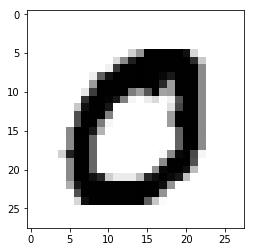

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist_data[index]))
print("As image:\n")
plt.imshow(mnist_data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

**a)** Split the MNIST dataset into a training set and a test set. Use 60,000 instances for training and 10,000 for test.

**b)** Train a Random Forest classifier on the dataset and time how long it takes.
   Then evaluate the resulting model on the test set (disregarding "don't use test set")

**c)** Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

**d)** Train a new Random Forest classifier on the reduced dataset and see how long it takes.
   Was training much faster? Next evaluate the classifier on the test set: how does it
   compare to the previous classifier?

**e)** Using at least two other classifiers from the curriculum, train a model on the reduced dataset. For each model, you must tune at least two hyperparameters.

**f)** Use t_SNE to reduce the MNIST dataset down to two dimensions and plot the result using
   Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s
   target class. Alternatively, you can write colored digits at the location of each instance,
   or even plot scaled-down versions of the digit images themselves.
   You should get a nice visualization with well-separated clusters of digits.
   Do the same using PCA and compare the resulting vizualisations. You can see examples in the course book pp. 168-169.

**g)** These questions require no code.
 - What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

 - Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

 - Can PCA be used to reduce the dimensionality of a highly nonlinear dataset? Explain.

 - Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

 - How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

# Exercise 3: Cluster Analysis

For this exercise we return to the MNIST data, and we are exploring several clustering techniques with it.

**a)** Perform k-means clustering with k=10 on this dataset.

**b)** Using visualization techniques analogous to what we have done in the Clustering notebook
   for the faces data, can you determine the 'nature' of the 10 constructed clusters?
   Do the clusters (roughly) coincide with the 10 different actual digits?

**c)** Perform a supervised clustering evaluation using adjusted rand index.
   Are the results stable, when you perform several random restarts of k-means?

**d)** Now perform hierarchical clustering on the data.
   (in order to improve visibility in the constructed dendrograms, you can also use a
   much reduced dataset as constructed using sklearn.utils.resample shown below).
   Does the visual analysis of the dendrogram indicate a natural number of clusters?

**e)** Using different cluster distance metrics (ward,single,average, etc.),
   what do the clusterings look like that are produced at the level of k=10 clusters?
   See the Clustering notebook for the needed Python code, including the fcluster
   method to retrieve 'plain' clusterings from the hierarchical clustering.

In [ ]:
small_mnist_data,small_mnist_label = skl.utils.resample(mnist.data,mnist.target,n_samples=200,replace='false')

**f)** Do a DBSCAN clustering of the small dataset. Tweak the different parameters.

**g)** Try to compare the different clustering methods on the MNIST dataset in the same way
   the book does on the faces dataset on pp. 195-206.